In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import ROOT
from ROOT import TH1F, TCanvas

from sklearn.metrics import r2_score

import uproot

Welcome to JupyROOT 6.28/09


In [2]:
with uproot.open("../pythia/WS_R_100k/dataset_selected_R_100k_combined.root:fastjet") as f:
    costheta_post_R = f["costheta"].array()
    
with uproot.open("../madgraph/pp_tt_semi_full_R_100k/labels_R_100k_combined.root:labels") as f:
    costheta_pre_R = f["costheta"].array()

In [3]:
with uproot.open("../pythia/WS_L_100k/dataset_selected_L_100k_combined.root:fastjet") as f:
    costheta_post_L = f["costheta"].array()
    
with uproot.open("../madgraph/pp_tt_semi_full_L_100k/labels_L_100k_combined.root:labels") as f:
    costheta_pre_L = f["costheta"].array()

In [4]:
def fit_beta(angles, polarization):
    # Convert list to numpy array
    angles = np.array(angles)
    
    # Define polarization
    if "L" in polarization:
        p=-1
    if "R" in polarization:
        p=1    
    
    # Book Histogram
    hist_angles = TH1F( "title", "title", 100, -1, 1 )

    # Book Canvas
    c = ROOT.TCanvas("c", "Histogram Canvas", 800, 600)
    
    # Fill Histogram
    for angle in angles:
        hist_angles.Fill(angle)
        
    hist_angles.Scale(1/hist_angles.Integral("width"))
        
    # Draw Histogram
    hist_angles.Draw()
    #c.SaveAs(title+".png")
    #c.Draw()
        
    # Define Custom Fit Function
    def beta_function(costheta, parameters):
        return 1/2*(1+parameters[0]*costheta[0])
    
    # Initialize Fit Function
    fit = ROOT.TF1("fit", beta_function, -1, 1, 1)
    fit.SetParameters(0)
    fit.SetParNames("p*Beta")
    
    # Perform Fit
    #hist_angles.Fit(fit)
    hist_angles.Fit(fit, "e")
    #hist_angles.Fit(fit, "q")
    
    # Print Results
    fitted_beta = fit.GetParameters()[0]*p
    method_2 = np.mean(angles)*3*p
    positive_angles = len(angles[angles>0])
    negative_angles = len(angles[angles<0])
    method_3 = (positive_angles-negative_angles)/(positive_angles+negative_angles)*2*p
        
    #print(fitted_beta)
    return fitted_beta

In [5]:
beta_raw_L = fit_beta(costheta_pre_L, "L")
beta_raw_R = fit_beta(costheta_pre_R, "R")

/tmp/ipykernel_813941/572821779.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  angles = np.array(angles)


 FCN=93.6259 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=7.29096e-18    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p*Beta      -1.00034e+00   2.09119e-03   2.09119e-03  -1.82606e-06
 FCN=86.2133 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=7.79215e-17    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p*Beta       1.00405e+00   1.90442e-03   1.90442e-03  -6.55513e-06


In [6]:
beta_post_L = fit_beta(costheta_post_L, "L")
beta_post_R = fit_beta(costheta_post_R, "R")

 FCN=117.977 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=5.03889e-18    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p*Beta      -1.00106e+00   5.22900e-03   5.22900e-03  -6.07105e-07
 FCN=95.0084 FROM MINOS     STATUS=SUCCESSFUL      2 CALLS          22 TOTAL
                     EDM=1.93969e-16    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p*Beta       1.00345e+00   4.06726e-03   4.06726e-03   4.84261e-06


/tmp/ipykernel_813941/572821779.py:3: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  angles = np.array(angles)


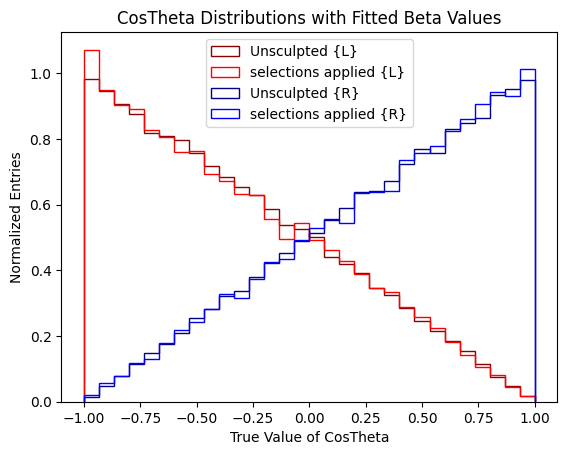

Unsculpted MadGraph {L}:  1.000344910183287
Unsculpted MadGraph {R}:  1.0040469748915914
Selections Applied {L}:   1.0010610683512053
Selections Applied {R}:   1.0034497060082974


In [7]:
plt.title("CosTheta Distributions with Fitted Beta Values")
plt.hist(costheta_pre_L,histtype='step',bins=30,range=(-1,1),color='darkred',label='Unsculpted {L}',linestyle="-",density=True)
plt.hist(costheta_post_L,histtype='step',bins=30,range=(-1,1),color='red',label='selections applied {L}',linestyle="-",density=True)
plt.hist(costheta_pre_R,histtype='step',bins=30,range=(-1,1),color='darkblue',label='Unsculpted {R}',linestyle="-",density=True)
plt.hist(costheta_post_R,histtype='step',bins=30,range=(-1,1),color='blue',label='selections applied {R}',linestyle="-",density=True)
plt.legend()
plt.ylabel("Normalized Entries")
plt.xlabel("True Value of CosTheta")
plt.show()

print("Unsculpted MadGraph {L}: ", beta_raw_L)
print("Unsculpted MadGraph {R}: ", beta_raw_R)

print("Selections Applied {L}:  ", beta_post_L)
print("Selections Applied {R}:  ", beta_post_R)